In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
from collections import defaultdict
import matplotlib.cm as cm

In [20]:
dataset=pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [22]:
K=5
m=200
Centroids=np.array([]).reshape(2,0)
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]

In [23]:
Centroids

array([[58., 62., 33., 17., 93.],
       [60., 55., 81., 40., 90.]])

In [60]:
num_iter=100
Output={}
for n in range(1):
    #step 2.a
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
#         print('tempDist' , k)
#         print(tempDist)
#         print('\n')
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
#         print('EuclidianDistance' , k)
#         print(EuclidianDistance)
#         print('\n')
#     print("Euclidian")
#     print(EuclidianDistance)
#     print(EuclidianDistance.shape)
    C=np.argmin(EuclidianDistance,axis=1)+1
#     print(C.shape)
#     print(np.argmin(EuclidianDistance,axis=1)+1)
    
    #step 2.b
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(2,0)
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
    for k in range(K):
        Y[k+1]=Y[k+1].T
        
        
    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1],axis=0)
        
    Output=Y


Euclidian
[[1.72176531e+03 5.75123611e+03 1.74429752e+03 4.54926276e+02
  6.97779356e+03]
 [2.58591531e+03 9.31423611e+03 1.17752066e+02 3.73823062e+03
  5.11902433e+03]
 [3.43861531e+03 5.28223611e+03 5.47684298e+03 3.28578450e+02
  1.07711782e+04]
 [2.27244031e+03 8.67840278e+03 1.00206612e+02 3.25192628e+03
  5.00197304e+03]
 [1.54499031e+03 5.50806944e+03 1.62566116e+03 4.50882798e+02
  6.61038330e+03]
 [2.14169031e+03 8.41806944e+03 8.74793388e+01 3.12114367e+03
  4.87315253e+03]
 [3.28626531e+03 4.99923611e+03 5.44193388e+03 2.91361059e+02
  1.04930243e+04]
 [3.33686531e+03 1.07045694e+04 2.73933884e+02 5.41066541e+03
  4.83846022e+03]
 [3.48436531e+03 4.93923611e+03 5.87666116e+03 3.74230624e+02
  1.08227166e+04]
 [1.79904031e+03 7.68773611e+03 9.94793388e+01 2.66323062e+03
  4.66402433e+03]
 [2.57769031e+03 4.73940278e+03 4.31766116e+03 1.01143667e+02
  9.20289612e+03]
 [3.73156531e+03 1.13552361e+04 4.30842975e+02 6.15092628e+03
  4.84610125e+03]
 [2.43609031e+03 4.59673611e+0

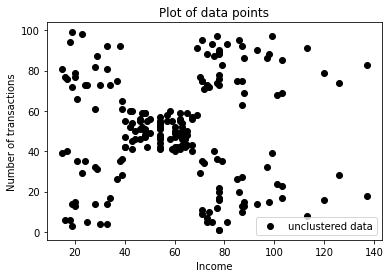

In [58]:
plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('Income')
plt.ylabel('Number of transactions')
plt.legend()
plt.title('Plot of data points')
plt.show()

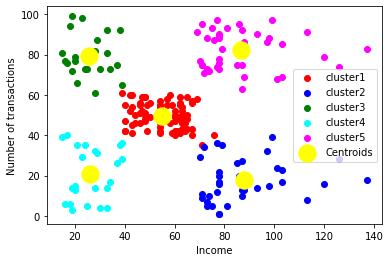

In [26]:
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('Income')
plt.ylabel('Number of transactions')
plt.legend()
plt.show()